In [14]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
from plot_diff_si import * 


# Si

In [15]:
si_data= pd.read_csv("si_qmc_dens_vxc.csv",index_col=0)

In [16]:
newdens_QMC = si_data["density_qmc"].to_numpy()
vxc_qmc=si_data["vxc_qmc"].to_numpy()
newerbar_QMC = si_data["erbar_qmc"].to_numpy()
erbar= get_dens_inSD_si(newerbar_QMC)

## Analyse

In [17]:
def get_data_from_npz(npz_file, it=-1): 
    hold= np.load(npz_file)
    dens=hold["dens_history"][it]
    vxc=hold["potxc_history"][it]
    bands=hold["bands_history"][it]
    residu= hold["diff_l"].real
    direct_gap=(bands[0,4]-bands[0,3]) * 27.211
    gap=np.min( np.abs(bands[:,4]-bands[0,3]) ) * 27.211
    print("============")
    print("diff on density for the last iteration: {:.2e}".format(residu[it]))
    print("The direct gap is {:.4f} ev | QMC = 2.72 ev".format(direct_gap))
    #print("The gap is {:.4f} for this k-grid ev| QMC = 0.82 ev".format(gap))    
    print("============")

    return dens, vxc, direct_gap, gap, residu, bands 

## Connector 

In [18]:
#! scp  ara:/home/me36sin/fxc_conn_article/Si/calculations/IntPrefact/si_IntPrefactorcon_consym.npz si_IntPrefactor_con_consym_v2.npz
#! scp  ara:/home/me36sin/fxc_conn_article/Si/calculations/si_IntPrefactor_con_consym.npz .
#! scp  ara:/home/me36sin/fxc_conn_article/Si/calculations/si_newPrefOldconsym_consym.npz .


- consym_IntPrefactor: $v_{\rm xc} = v^h_{\rm xc} (n^c)$ 
and $n^c= \frac{1}{\int f_{\rm xc}(n_0,{\bf r,r'} ) } \int f_{\rm xc}(n_0, {\bf r,r'} ) n({\bf r'})$ with $n_0=0.5(n({\bf r})+n({\bf r'}))$

- consym_old: $v_{\rm xc} = v^h_{\rm xc} (n^c)$ 
and $n^c= \frac{1}{f_{\rm xc}(n_0) } \int f_{\rm xc}(n'_0, {\bf r,r'} ) n({\bf r'})$ with $n_0=0.5(n({\bf r})+n^c({\bf r}))$ and $n'_0=0.5(n({\bf r})+n({\bf r'}))$



connector sym with corrected prefactor
diff on density for the last iteration: 1.76e-17
The direct gap is 2.6467 ev | QMC = 2.72 ev
connector sym old
diff on density for the last iteration: 1.72e-17
The direct gap is 2.7129 ev | QMC = 2.72 ev


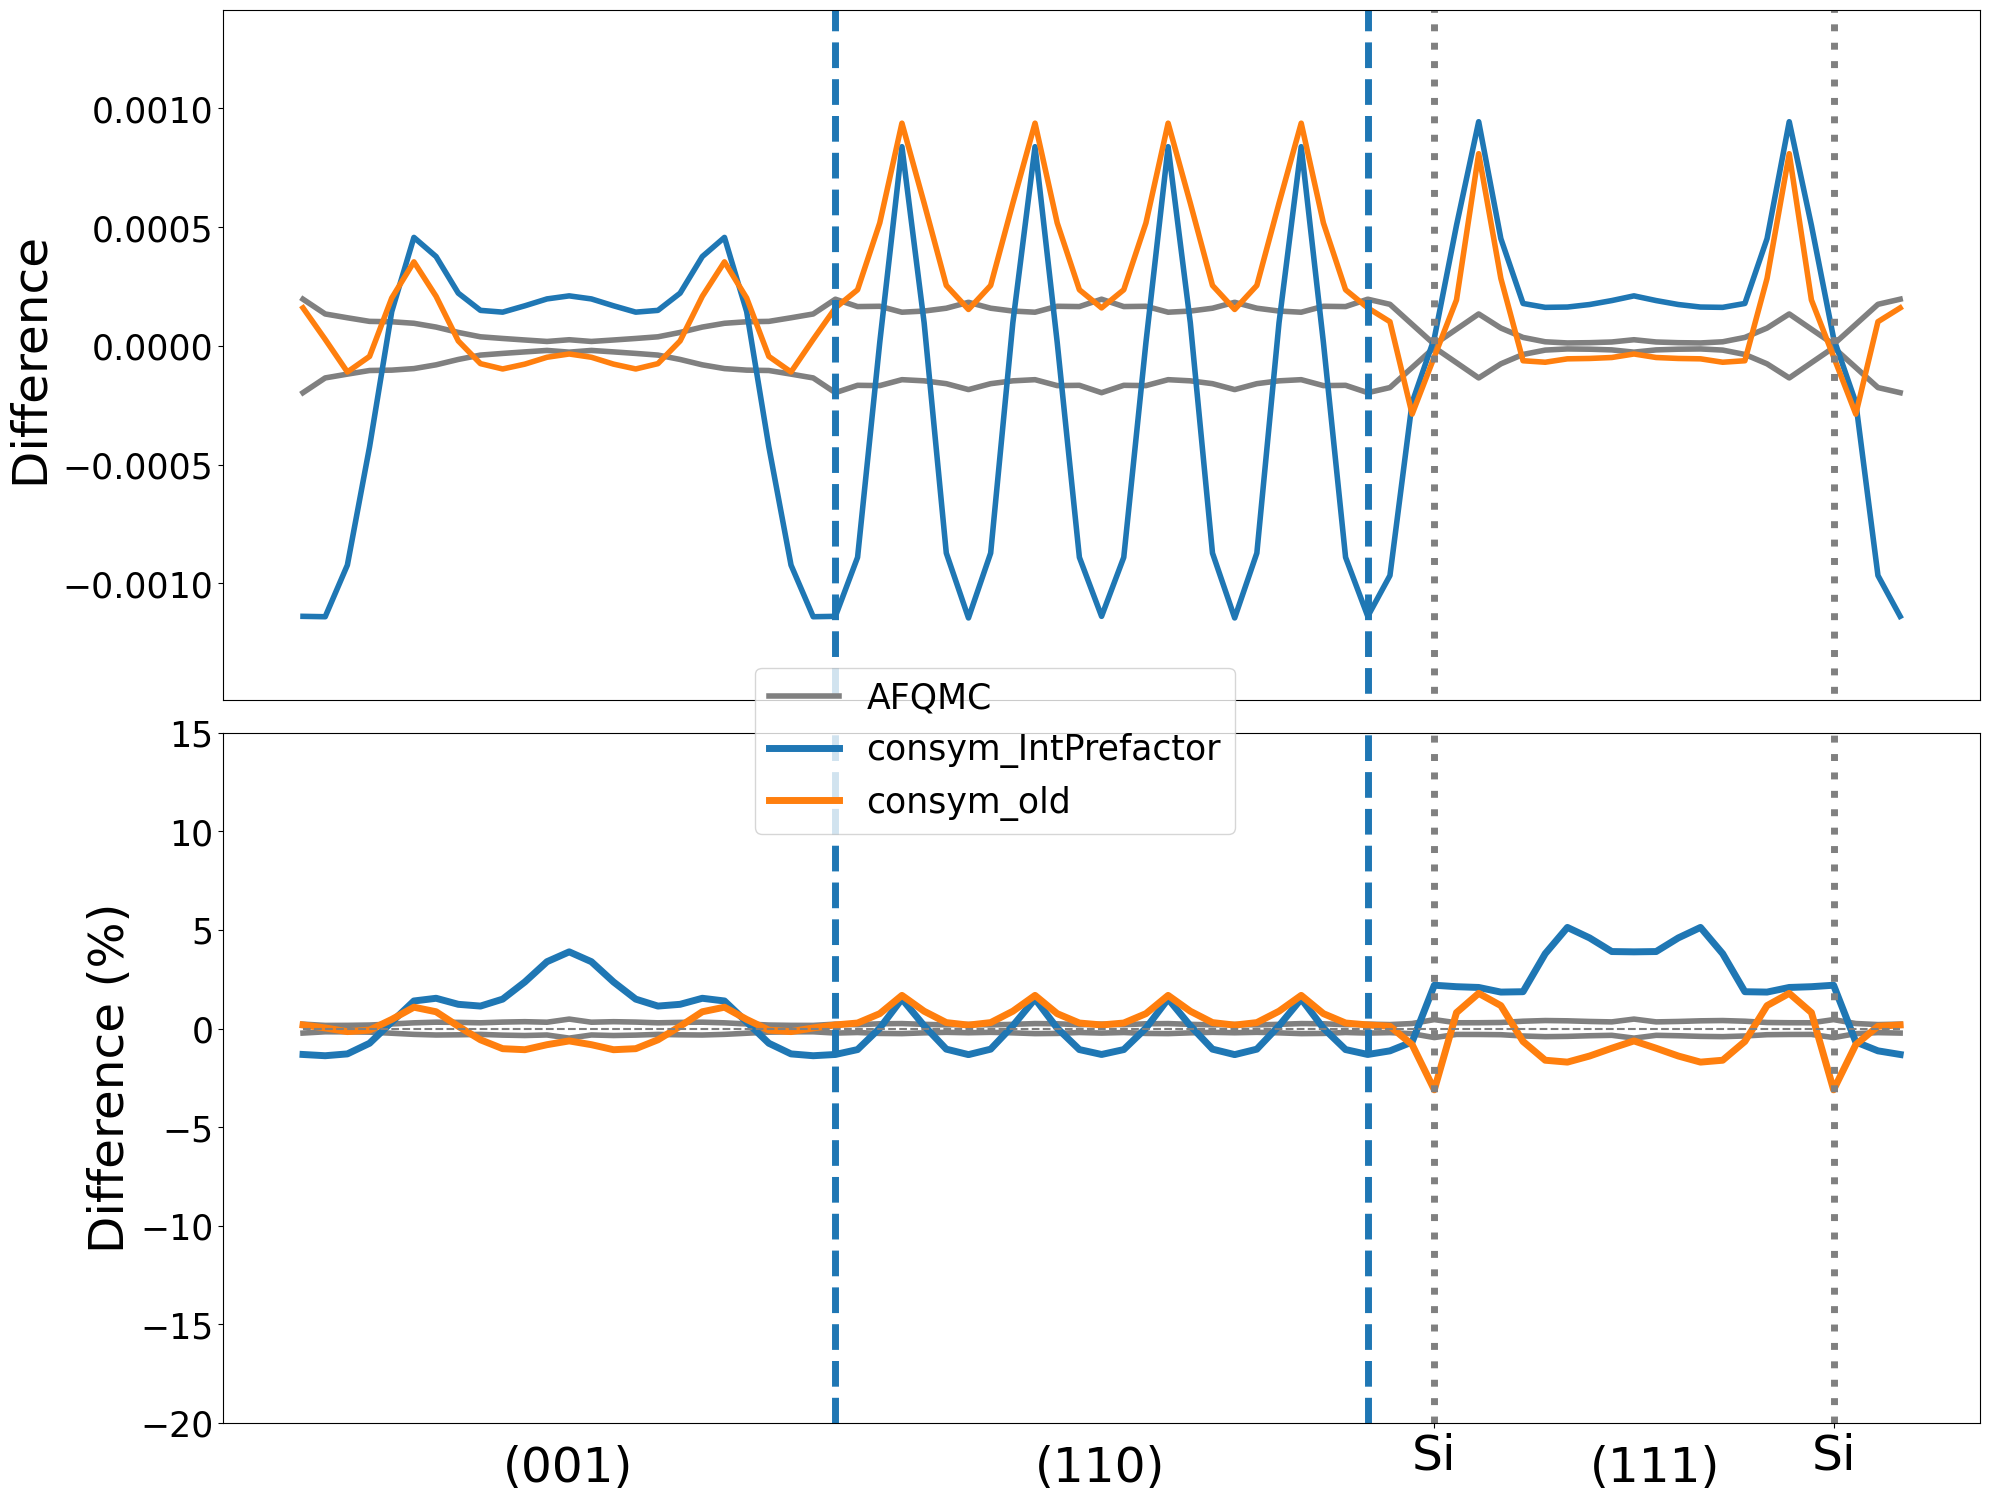

In [20]:
print("connector sym with corrected prefactor")
dens_con1,vxc_con1,_,_,_,_= get_data_from_npz("si_IntPrefactor_con_consym_v2.npz", it=-1)
print("connector sym old")
dens_con2,vxc_con2,_,_,_,_= get_data_from_npz("si_consym_old.npz")
#dens_con2,vxc_con2,_,_,_,_= get_data_from_npz("si_IntPrefactor_con_consym.npz")
#dens_con2,vxc_con2,_,_,_,_= get_data_from_npz("si_newPrefOldconsym_consym.npz")

diff_con1= get_dens_inSD_si(dens_con1-newdens_QMC) 
#diff_consym_old=get_dens_inSD(dens_con2-newdens_QMC)
diff_con2= get_dens_inSD_si(dens_con2)-get_dens_inSD_si(newdens_QMC) 

diff_approx= [diff_con1, diff_con2] 
plot_diff_func(get_dens_inSD_si(newdens_QMC), diff_approx, ["consym_IntPrefactor","consym_old"],erbar) 

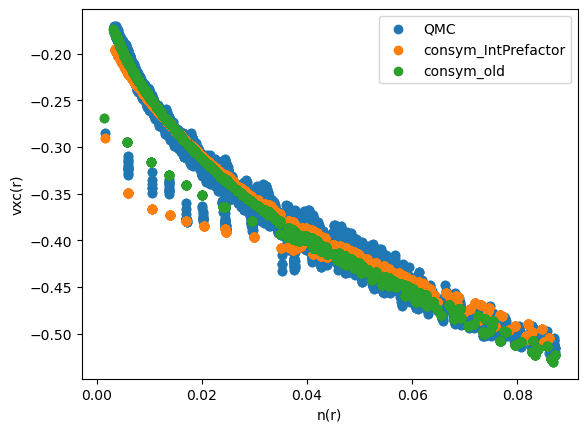

In [8]:
plt.rcdefaults()
#with plt.style.context("latex-sans"):
plt.scatter(newdens_QMC,vxc_qmc, label="QMC")
plt.scatter(dens_con1, vxc_con1, label="consym_IntPrefactor")
plt.scatter(dens_con2, vxc_con2, label="consym_old")
plt.xlabel("n(r)")
plt.ylabel("vxc(r)")
plt.legend()

## Linear approximation 

In [9]:
#! scp  ara:/home/me36sin/fxc_conn_article/Si/calculations/si_IntPrefactor_lin_linear_consym.npz .

- linear_sym: $v_{\rm xc} = v_{\rm xc}(n_{\rm mean})  + \int f_{\rm xc}(n_0, {\bf r,r'} ) (n({\bf r'})-n_0)$ with $n_0=0.5(n({\bf r})+n({\bf r'}))$

diff on density for the last iteration: 1.76e-17
The direct gap is 2.6467 ev | QMC = 2.72 ev
diff on density for the last iteration: 1.72e-17
The direct gap is 2.7129 ev | QMC = 2.72 ev


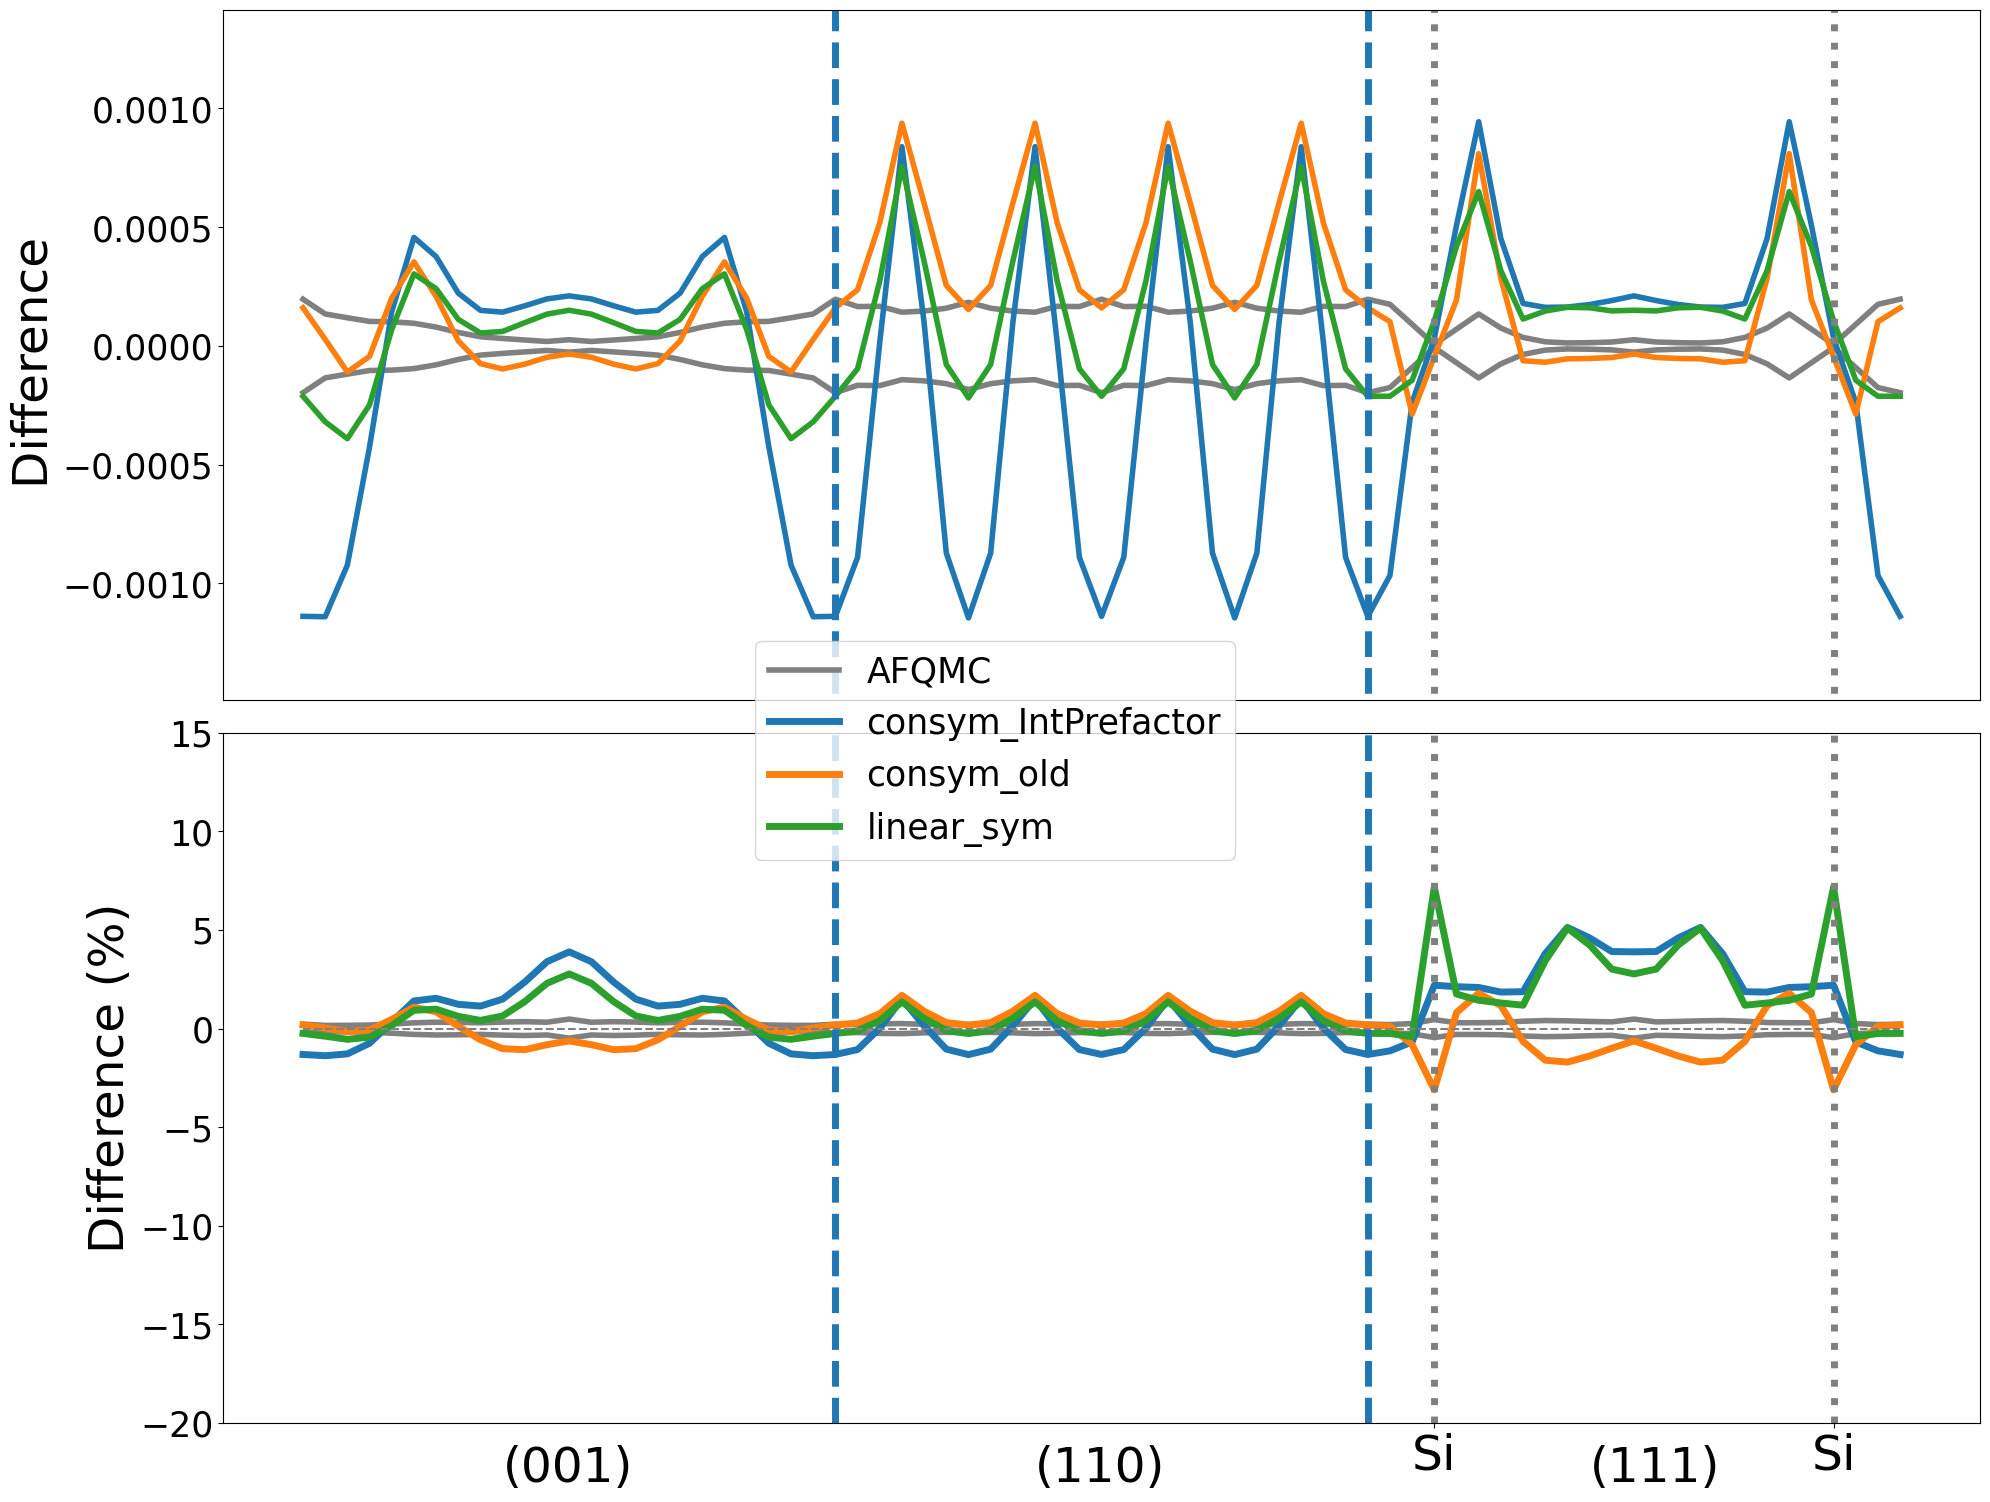

In [21]:
dens_con1,vxc_con1,_,_,_,_= get_data_from_npz("si_IntPrefactor_con_consym_v2.npz")
dens_con2,vxc_con2,_,_,_,_= get_data_from_npz("si_consym_old.npz")
dens_con3= np.load("densLinSym_direct.npz")["densR"]

diff_con1= get_dens_inSD_si(dens_con1-newdens_QMC) 
#diff_consym_old=get_dens_inSD(dens_con2-newdens_QMC)
diff_con2= get_dens_inSD_si(dens_con2)-get_dens_inSD_si(newdens_QMC) 
diff_con3= get_dens_inSD_si(dens_con3)-get_dens_inSD_si(newdens_QMC) 

diff_approx= [diff_con1, diff_con2,diff_con3] 
plot_diff_func(get_dens_inSD_si(newdens_QMC), diff_approx, ["consym_IntPrefactor","consym_old","linear_sym"],erbar) 

In [11]:
# old LDA 
dens_LDA_old=np.load('densLDA_25ry6k.npz')["densR"]

# Vxc=vxc(mean)
densR_mean=np.load('densmean_NY.npz')["densR"]
diag_mean=get_dens_inSD_si(densR_mean)

# LDA 
dens_LDA_NY= np.genfromtxt("densLDA_25ry6k.dat")
vxc_ref_lda=np.genfromtxt("VXC_lda.dat")

# n0=n(r)
densR_LinLDA_NY=np.load('densLinLDA_NY_si.npz')["densR"]
vxc_LinLDA_NY_para=np.load('densLinLDA_si_para.npz')["potxc_history"][-1]

#n0=nmean 
densR_Linmean=np.load('densLinmean_25ry6k.npz')["densR"]
densR_Linmean_NY= densR_Linmean + dens_LDA_NY-dens_LDA_old
vxc_Linmean_NY_para=np.load('densLinMean_si_para.npz')["potxc_history"][-4]

# n0= 0.5 (nc(r) + n(r))  
densR_Lin05ncnr= np.load('densLinSym05ncnr.npz')["densR"] 
vxc_Lin05ncnr_NY_para=np.load('densLinapprox_sym05ncnr.npz')["potxc_history"][8]

# n0 = 0.5 (n(r) + n(r'))
densR_LinSym_NY=np.load('densLinSym_direct.npz')["densR"]

In [12]:
def get_diff_si(densR): 
    return get_dens_inSD_si(densR) - get_dens_inSD_si(newdens_QMC)

approx_dict_si= { "MDA": (densR_mean, None), "LDA": (dens_LDA_NY,vxc_ref_lda) ,
            "linear_lda":(densR_LinLDA_NY, vxc_LinLDA_NY_para)  , "linear_mean": (densR_Linmean_NY, vxc_Linmean_NY_para) 
            , "linear_consym":(densR_LinSym_NY, None), "consym_old":(dens_con2, vxc_con2)} 


- linear_consym :  $v_{\rm xc}(n_0) + \int f_{\rm xc}(n'_0, {\bf r,r'} ) (n({\bf r'}) - n'_0)$ with $n_0=0.5(n({\bf r})+n^c({\bf r}))$ and $n'_0=0.5(n({\bf r})+n({\bf r'}))$

- linear_mean :  $v_{\rm xc}(n_0) - n_0 f_{\rm xc}(n_0) + \int f_{\rm xc}(n_0, {\bf r,r'} ) n({\bf r'}) $ with $n_0=n_{\rm mean}$ 

- linear_lda : $ v_{\rm xc}(n_0) + \int f_{\rm xc}(n_0, {\bf r,r'} ) (n({\bf r'}) - n_0)$ with $n_0=n({\bf r})$ 

MDA
LDA
linear_lda
linear_mean
linear_consym
consym_old


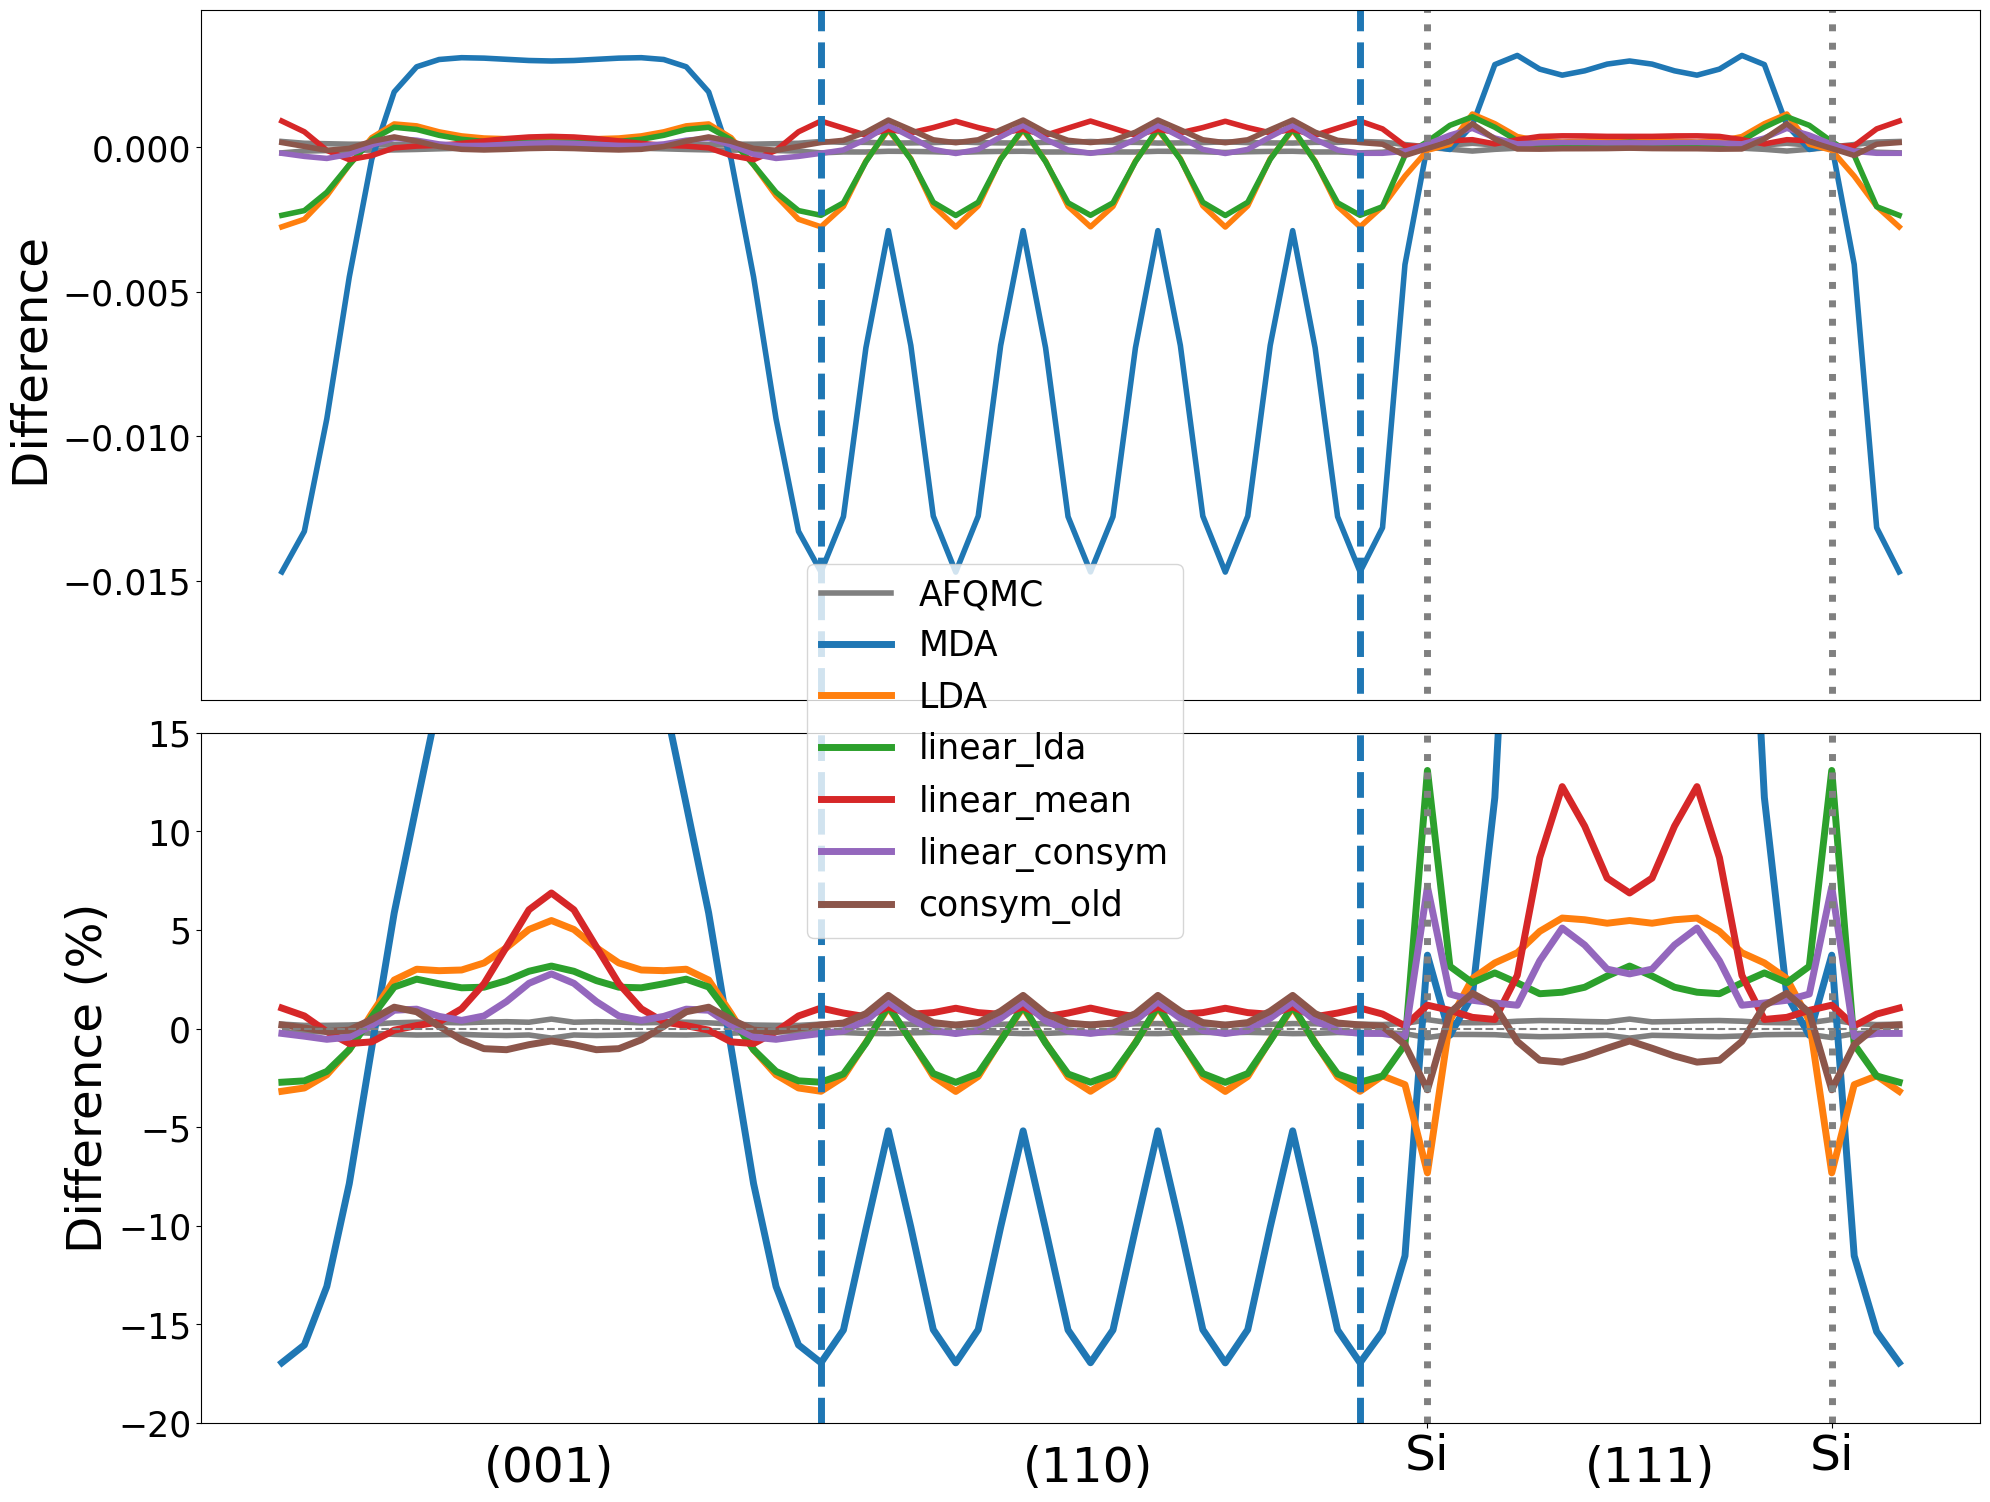

In [13]:
diff_approx, diff_labels=[],[]
for e in approx_dict_si: 
    print(e)
    diff_approx.append(  get_diff_si( approx_dict_si[e][0]) ) 
    diff_labels.append(e)
plot_diff_func(get_dens_inSD_si(newdens_QMC), diff_approx,diff_labels ,erbar) 

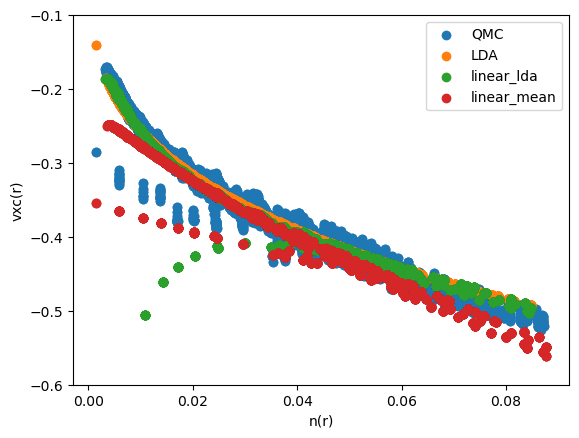

In [17]:
plt.rcdefaults()
plt.scatter(newdens_QMC,vxc_qmc, label="QMC")
for e in approx_dict_si:
    if approx_dict_si[e][1] is not None and e != "consym_old": 
        plt.scatter(approx_dict_si[e][0], approx_dict_si[e][1], label=e)
plt.xlabel("n(r)")
plt.ylabel("vxc(r)")
plt.ylim(-0.6,-0.1)
plt.legend()

# NaCl 

In [2]:
from plot_diff_nacl import * 
nacl_data=pd.read_csv("nacl_qmc.csv")


In [3]:
nacl_QMC_prim=np.genfromtxt('NaCl_AFQMC+corr+symavgciVeryNew_fft', skip_footer=0)
erbar_nacl=nacl_QMC_prim[:,-1]

In [4]:
def get_data_from_npz_nacl(npz_file, it=-1,skip_band=0): 
    hold= np.load(npz_file)
    dens=hold["dens_history"][it]
    vxc=hold["potxc_history"][it]
    if not skip_band:
        bands=hold["bands_history"][it]
        residu= hold["diff_l"].real
        direct_gap=(bands[0,8]-bands[0,7]) * 27.211
        gap=np.min( np.abs(bands[:,8]-bands[0,7]) ) * 27.211
        print("============")
        print("diff on density for the last iteration: {:.2e}".format(residu[it]))
        print("The direct gap is {:.4f} ev | QMC = 5.25 ev".format(direct_gap))
        #print("The gap is {:.4f} for this k-grid ev| QMC = 0.82 ev".format(gap))    
        print("============")
        return dens, vxc, direct_gap, gap, residu, bands 
    return dens , vxc 

In [5]:
newdens_QMC_nacl = nacl_data["dens"].to_numpy()
vxc_qmc_nacl=nacl_data["vxc_corr_shift"].to_numpy()
##
nacl_QMC_prim=np.genfromtxt('NaCl_AFQMC+corr+symavgciVeryNew_fft', skip_footer=0)
newerbar_QMC_nacl=nacl_QMC_prim[:,-1]
##
erbar_nacl= get_dens_inSD_nacl(newerbar_QMC_nacl)

## Connector 

diff on density for the last iteration: 4.65e-07
The direct gap is 4.5336 ev | QMC = 5.25 ev


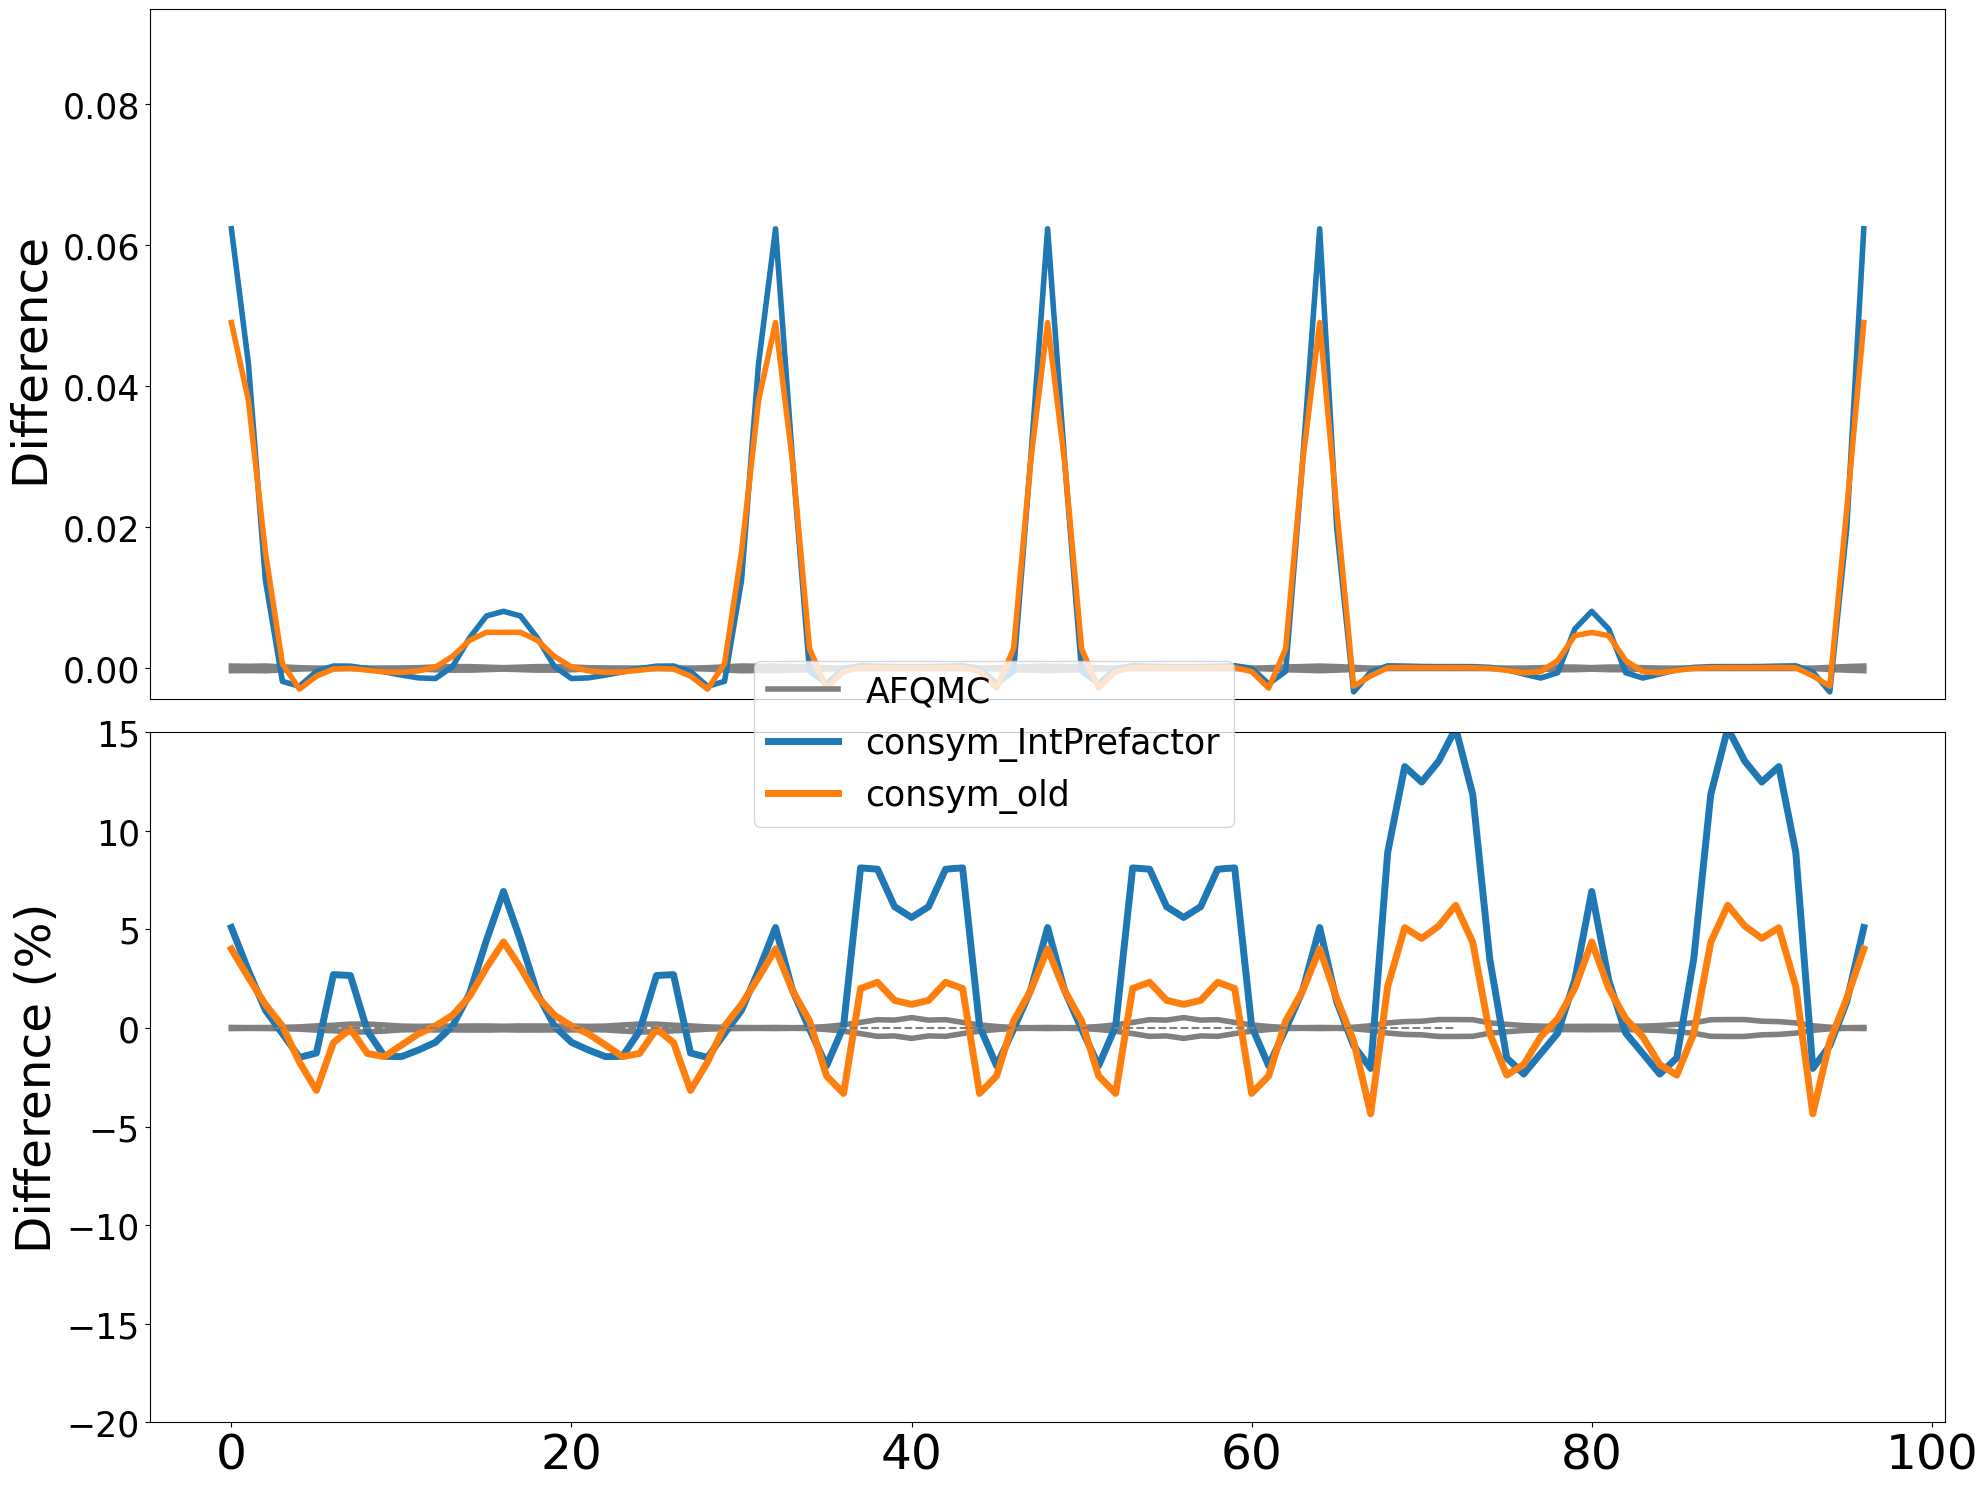

In [7]:
dens_con1,vxc_con1,_,_,_,_= get_data_from_npz_nacl("nacl_IntPrefactorcon_consym.npz", it=-1)
dens_con2,vxc_con2= get_data_from_npz_nacl("nacl_con05ncnr.npz", skip_band=1)
#dens_con2,vxc_con2,_,_,_,_= get_data_from_npz("si_IntPrefactor_con_consym.npz")
#dens_con2,vxc_con2,_,_,_,_= get_data_from_npz("si_newPrefOldconsym_consym.npz")

diff_con1= get_dens_inSD_nacl(dens_con1-newdens_QMC_nacl) 
#diff_consym_old=get_dens_inSD(dens_con2-newdens_QMC)
diff_con2= get_dens_inSD_nacl(dens_con2)-get_dens_inSD_nacl(newdens_QMC_nacl) 

diff_approx= [diff_con1, diff_con2] 
plot_diff_func(get_dens_inSD_nacl(newdens_QMC_nacl), diff_approx, ["consym_IntPrefactor","consym_old"],erbar_nacl, mat="nacl") 

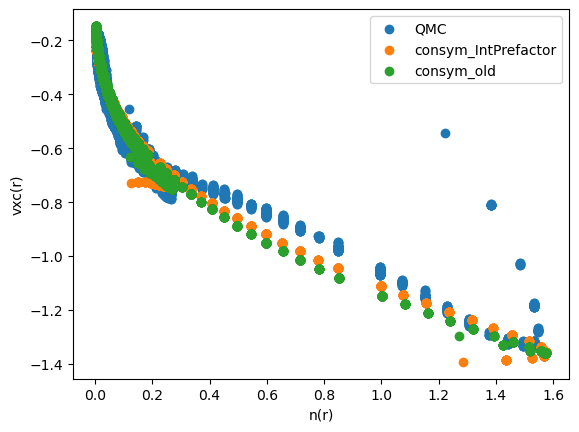

In [9]:
plt.rcdefaults()
plt.scatter(newdens_QMC_nacl,vxc_qmc_nacl, label="QMC")
plt.scatter(dens_con1, vxc_con1, label="consym_IntPrefactor")
plt.scatter(dens_con2, vxc_con2, label="consym_old")
plt.xlabel("n(r)")
plt.ylabel("vxc(r)")
plt.legend()

## Linear approximation 

In [ ]:
np.load("dens_history_LinSym_nacl.npz").files

['dens_history']

connector sym with corrected prefactor
diff on density for the last iteration: 4.65e-07
The direct gap is 4.5336 ev | QMC = 5.25 ev


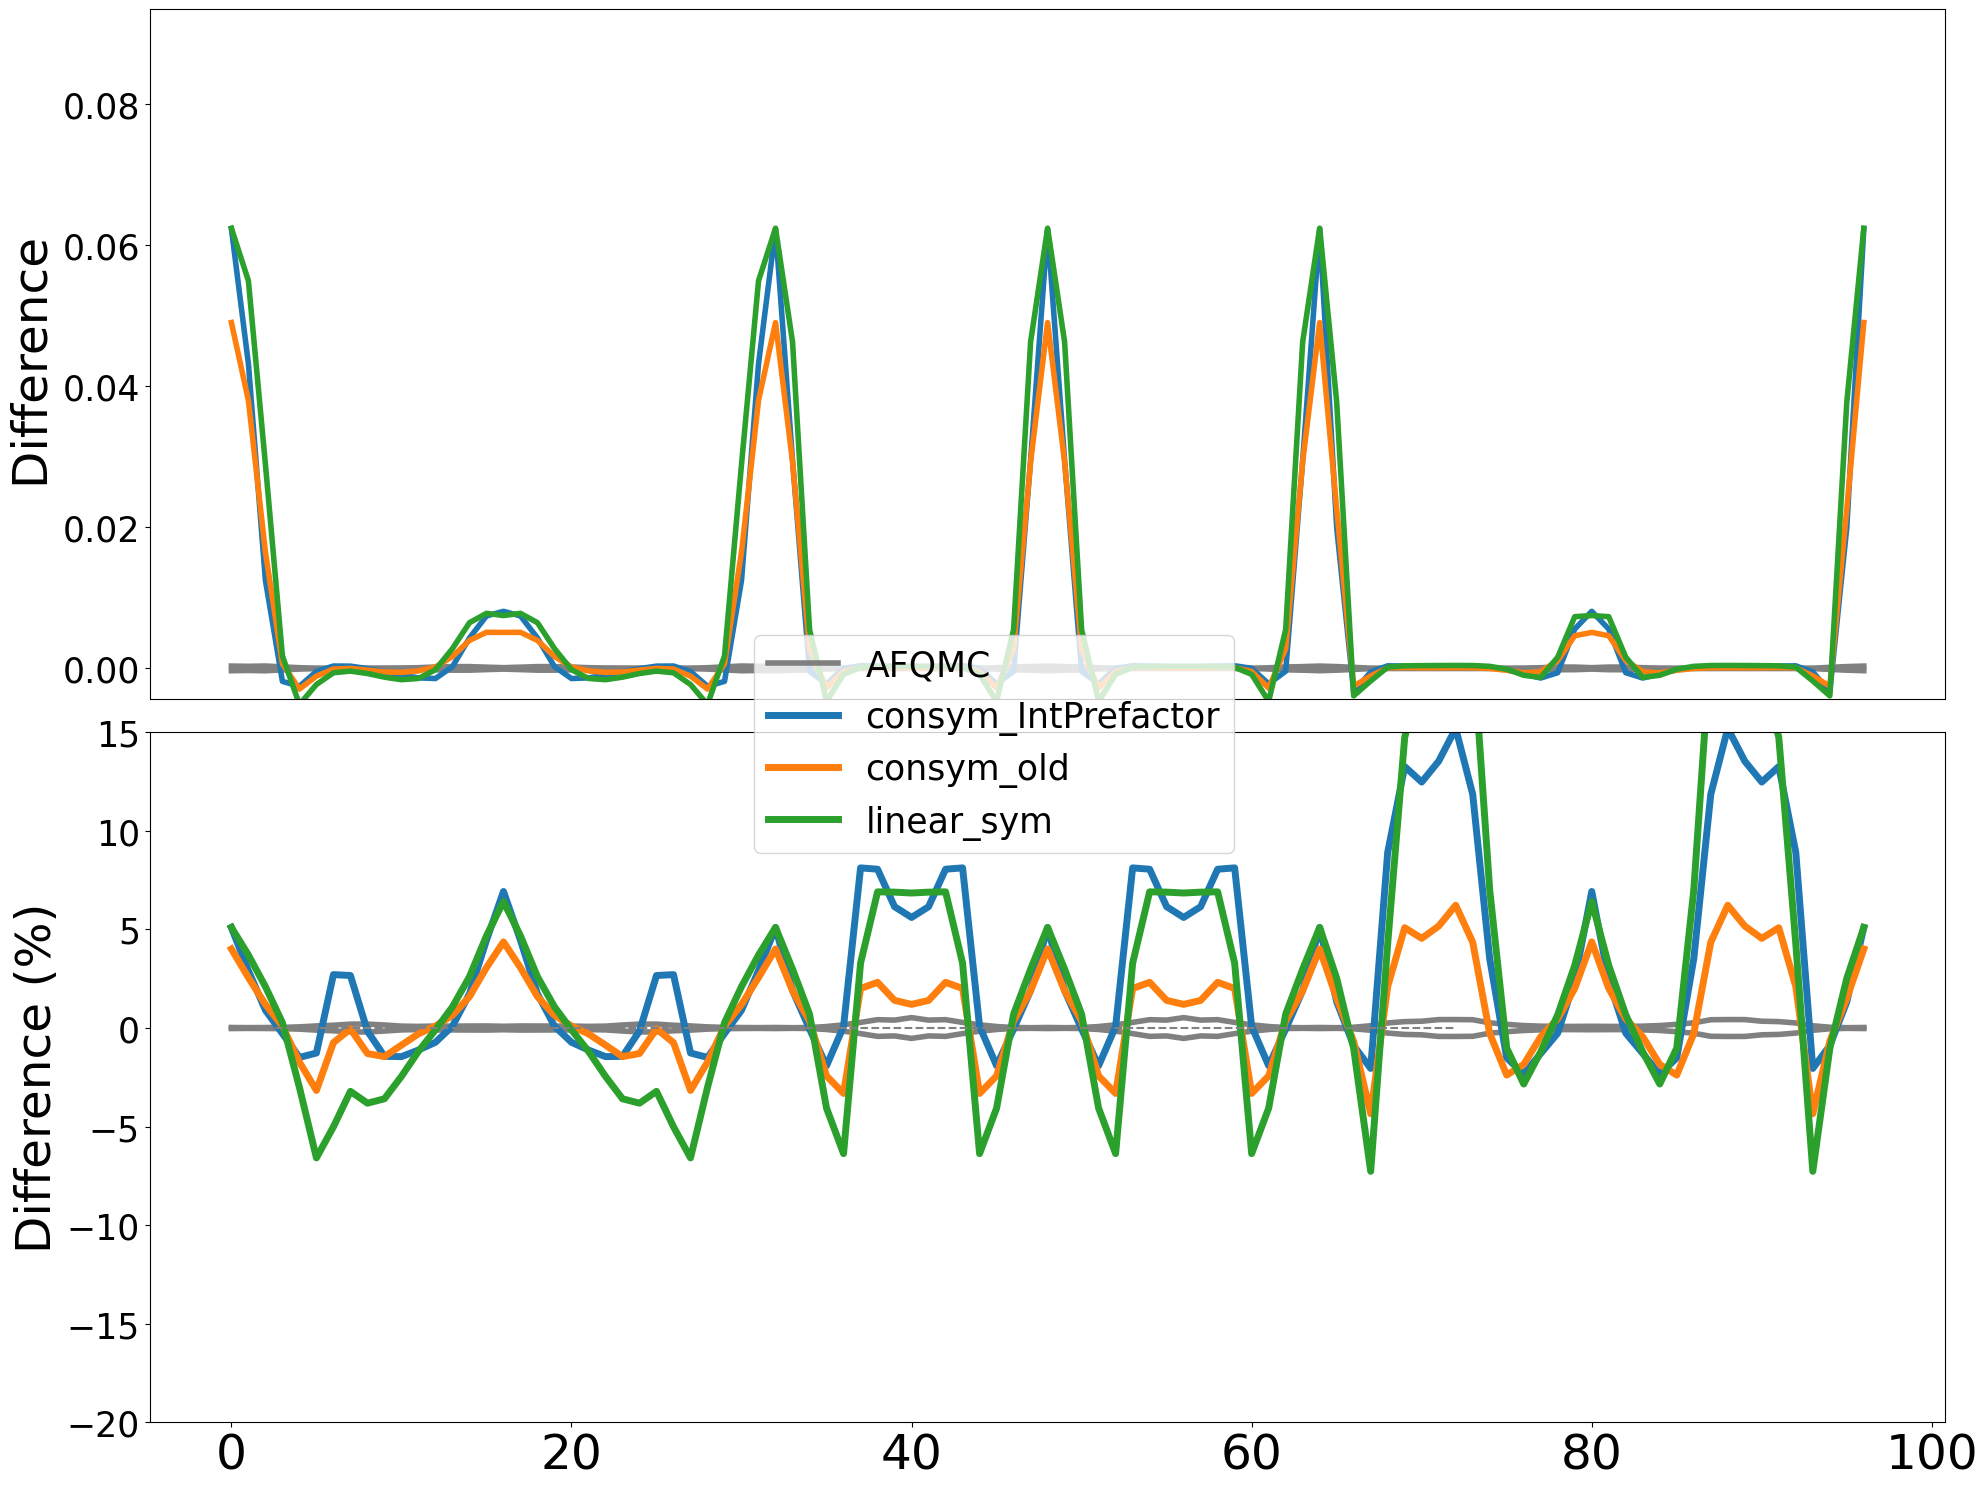

In [13]:
print("connector sym with corrected prefactor")
dens_con1,vxc_con1,_,_,_,_= get_data_from_npz_nacl("nacl_IntPrefactorcon_consym.npz")
dens_con2,vxc_con2= get_data_from_npz_nacl("nacl_con05ncnr.npz", skip_band=1)
dens_con3= np.load("dens_history_LinSym_nacl.npz")["dens_history"][-1]

diff_con1= get_dens_inSD_nacl(dens_con1-newdens_QMC_nacl) 
#diff_consym_old=get_dens_inSD(dens_con2-newdens_QMC)
diff_con2= get_dens_inSD_nacl(dens_con2)-get_dens_inSD_nacl(newdens_QMC_nacl) 
diff_con3= get_dens_inSD_nacl(dens_con3)-get_dens_inSD_nacl(newdens_QMC_nacl) 

diff_approx= [diff_con1, diff_con2,diff_con3] 
plot_diff_func(get_dens_inSD_nacl(newdens_QMC_nacl), diff_approx, ["consym_IntPrefactor","consym_old","linear_sym"],erbar_nacl, mat="nacl") 